# Calculations and transformations for face plane

In the below examples, datapoints to represent raw data, from the different conditions, left eye, right eye and the mouth are generated.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
import matplotlib as mpl
import cv2

names = ['left eye', 'right eye', 'mouth', 'outside']#names of the facial landmark locations
cm = 1 / 2.54 #scale of plots from inch to cm
img = plt.imread('3006.png', format=None)#background image
img = np.flipud(img)
col = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'] #color list
#points as measured on individuals, all with reference to the center between nosedrils
eye_x = 61.8
eye_y = 45.2
eye_z = 16.6
mouth_y = 17.8
mouth_z = 2.
head_w = 126.6
r = 0.5 * (head_w / 2)
new_y = (eye_y + mouth_y) * 0.5
a1 = np.array([-eye_x * 0.5, new_y]) / 2
a2 = np.array([eye_x / 2, new_y]) / 2
a3 = np.array([0., -new_y]) / 2
c = np.array([150, 150])#image center

dst_pts = np.array([a1 + c, a2 + c, a3 + c])#the destination locations of the true facial landmarks
#generation of simulated data of uncalibrated gaze locations
data_p = [np.random.normal(0., 4, size=(2, 60 * 4)) + i.reshape(-1, 1) for i in dst_pts]
M = np.array([[0.8, 0.33898415, -41.8265475],
              [-0.33898415, 0.94079208, 59.52971478]])#affine transformation matrix
data_p = [cv2.transform(np.array([xy3.T]), M)[0].T for xy3 in data_p]#distortion of points

src_pts = np.array([(np.median(p[0]),np.median(p[1])) for  p in data_p])#the median of the source projected facial landmarks

In [2]:
#plotting function
from misc import plot_aoi

In the below example code the raw data points and their median are plotted, as well as the destination points.

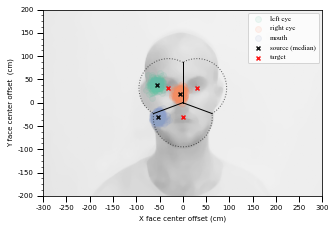

In [3]:
fig, ax = plt.subplots(figsize=(12 * cm, 9 * cm))
ax.imshow(img)
plt.gca().invert_yaxis()
for n, c, xy3 in zip(names, col, data_p):
    ax.scatter(*xy3, alpha=0.1, label=n, c=c)

plt.scatter(*src_pts.T, alpha=0.9, marker='x', c='k', label='source (median)', s=16)
plt.scatter(*dst_pts.T, alpha=0.9, marker='x', c='r', label='target', s=16)
ax=plot_aoi(dst_pts,r,ax)
plt.show()

In the below example code the affine transformation matrix (M2) that transforms the three points (src_pts),to the three points (dst_pts) is estimated. The matrix (M2) is then used to correct all the raw points.

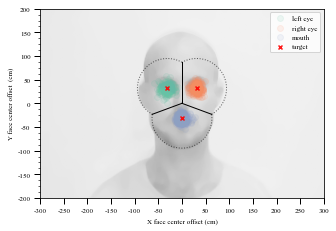

In [4]:
fig, ax =plt.subplots(figsize=(12*cm, 9*cm))
ax.imshow(img)
plt.gca().invert_yaxis()

M2, mask = cv2.estimateAffine2D(src_pts,dst_pts)
for n,c,xy3 in zip(names,col,data_p):
    dst=cv2.transform(np.array([xy3.T]), M2)[0].T
    ax.scatter(*dst,alpha=0.1,label=n,c=c)

plt.scatter(*dst_pts.T,alpha=0.9,marker='x',c='r',label='target',s=16)
ax=plot_aoi(dst_pts,r,ax)
plt.show()